<font size="+5">#09. Componentes Principales (PCA)</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [1]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet citation,23.5,6,173.0,110.0,2725,12.6,81,usa
saab 99e,25.0,4,104.0,95.0,2375,17.5,70,europe
chevrolet concours,17.5,6,250.0,110.0,3520,16.4,77,usa
buick skylark,26.6,4,151.0,84.0,2635,16.4,81,usa
toyota carina,20.0,4,97.0,88.0,2279,19.0,73,japan
dodge st. regis,18.2,8,318.0,135.0,3830,15.2,79,usa
ford galaxie 500,14.0,8,351.0,153.0,4154,13.5,71,usa
ford fiesta,36.1,4,98.0,66.0,1800,14.4,78,usa
ford maverick,24.0,6,200.0,81.0,3012,17.6,76,usa


# Seleccionar Todas las Variables para el Análisis de Clúster

> Todas son explicativas, por lo que `model.fit(df)`

In [2]:
import pandas as pd

In [3]:
df=df.dropna()

In [4]:
df=pd.get_dummies(df,drop_first=True)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1


# Escalar los Datos

> 1. Recuerda que no es lo mismo incrementar 1 kilogramo que un 1 metro de algura.
> 2. La solución está en `StandardScaler()`.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
datos_normalizados=scaler.fit_transform(X=df)

In [9]:
dfnorm=pd.DataFrame(datos_normalizados,columns=df.columns, index=df.index)

In [10]:
dfnorm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597


# Entrenar Modelo `KMeans()`

## Seleccionar Número Óptimo k de Clústers

> - Aplicar el método del codo.
> - Recuerda que este método es muy `subjetivo`.
> - Pueden haber más de 2-3 números posibles.

In [11]:
from sklearn.cluster import KMeans

In [12]:
error=[]

In [13]:
error

[]

## Entrenar Modelo con Número k de Clústers Óptimo

In [14]:
dfnorm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...
ford mustang gl,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
vw pickup,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
dodge rampage,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597


> `model.fit()`

# Realizar Predicciones

> - Son las mismas que `model.labels_`?

In [15]:
 for numero in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]: 
    
    model=KMeans(n_clusters=numero)

    model.fit(dfnorm)

    inercia=model.score(dfnorm)

    error.append(inercia)

    error

C:\Users\apoga\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
error

[-3527.999999999999,
 -1855.3724919344506,
 -1367.5540401487035,
 -1091.0655795401112,
 -927.5566508553633,
 -845.9553011878751,
 -767.0117408646088,
 -708.4233870377225,
 -634.495916004967,
 -596.6302203001027]

In [17]:
dfsel=dfnorm.copy()

In [18]:
dfsel['cluster']=model.predict(dfnorm)

In [19]:
dfsel.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,cluster
name,,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597,1
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597,1
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597,1
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597,1
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597,1
ford galaxie 500,-1.083498,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-0.50239,0.774597,1
chevrolet impala,-1.211785,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-0.50239,0.774597,1
plymouth fury iii,-1.211785,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-0.50239,0.774597,1
pontiac catalina,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-0.50239,0.774597,1


# Visualizar Modelo

> - Haz un `scatterplot` con 2 variables.
> - Colorea los puntos según el grupo.
> Por qué están mezclados los grupos?
> Cómo lo solucionamos?
> - PCA. Siguiente apartado.

In [20]:
import matplotlib.pyplot as plt

In [21]:
dfgroup=dfsel.groupby('cluster')

In [32]:
dfgroup.get_group(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,cluster
name,,,,,,,,,,
chevrolet vega 2300,0.584228,-0.864014,-0.520637,-0.376395,-0.841175,-0.014999,-1.353505,-0.50239,0.774597,2
chevrolet vega (sw),-0.185492,-0.864014,-0.520637,-0.844632,-0.671427,1.255261,-1.353505,-0.50239,0.774597,2
mercury capri 2000,-0.057205,-0.864014,-0.692868,-0.480448,-0.893042,-0.559396,-1.353505,-0.50239,0.774597,2
plymouth cricket,0.327654,-0.864014,-0.989490,-0.896659,-1.205425,1.799657,-1.353505,-0.50239,0.774597,2
dodge colt hardtop,0.199368,-0.864014,-0.927295,-0.636527,-1.003850,0.529398,-1.081695,-0.50239,0.774597,2
chevrolet vega,-0.442065,-0.864014,-0.520637,-0.376395,-0.671427,1.436726,-1.081695,-0.50239,0.774597,2
ford pinto runabout,-0.313779,-0.864014,-0.692868,-0.480448,-0.885969,0.347933,-1.081695,-0.50239,0.774597,2
ford pinto (sw),-0.185492,-0.864014,-0.692868,-0.480448,-0.686752,0.166467,-1.081695,-0.50239,0.774597,2
dodge colt (sw),0.584228,-0.864014,-0.922511,-0.636527,-0.959055,-0.196464,-1.081695,-0.50239,0.774597,2


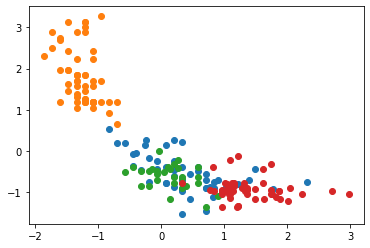

In [35]:
for grupo in [0,1,2,3]:
    plt.scatter(x='mpg',y='horsepower',data=dfgroup.get_group(grupo))


## Agrupación de Variables en Componentes Principales con `PCA()`

> Obviamente, no vamos a poder representar más que **2 variables en un Scatterplot**. Sin embargo, nuestro Análisis de Clúster ha tenido en cuenta más de 2 variables. Por este motivo debemos **Agrupar las Variables** que más se correlacionen en otras nuevas variables: las **Componentes Principales**.
>
> - La función `fit_transform()` nos devolverá una matriz con las nuevas variables.
> - Tras obtener la matriz, vamos a representarla en un `DataFrame` con la función `pd.DataFrame(matriz)`.
> - Posteriormente renombraremos las columnas. Por ejemplo, si el `DataFrame` tiene 4 columnas, deberemos renombrarlas aplicando el siguiente código: `matriz.columns = ['PC1', 'PC2', 'PC3', 'PC4']`.

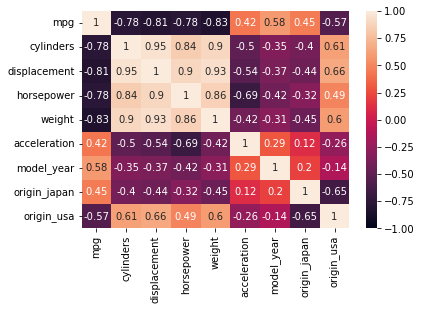

In [24]:
sns.heatmap(dfnorm.corr(), annot=True, vmin=-1);

## Visualizar las 2 Primeras Componentes con el Cluster

> - Eje X: `PC1`
> - Eje Y: `PC2`
> - `hue = model.labels_`
> - (Opcional) Representar los centroides. Deberíamos transformar los centroides en términos de Componentes Principales con `modelopca.transform(datos)`.

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca=PCA()

## Interpretar Visualización

> - Qué tienen que ver `PC1` Y `PC2` con las variables originales?
> - Por qué se distinguen los grupos? Uno se sitúa más a la derecha? Otro más a la izquierda? Uno más arriba o abajo? Por qué?

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] En este capítulo empezaremos a ir conectando los puntos de estadística y serás capaz de ir simplificando la gran variedad que existe en ella.
- [ ] Nos daremos cuenta de lo simple que es la estadística y que podría resumirse en la **Suma de Cuadrados**.
- [ ] Distinguir cuándo usar un modelo u otro porque no vale todo con todo. Sino que hay que ir viendo las soluciones concretas a cada necesidad.
- [ ] Entender la necesidad de **Normalizar** los datos.
- [ ] Familiarizarnos, aún más, con el término de la optimización.
- [ ] Ver de forma práctica cómo se usa el **Álgebra en Machine Learning**.